In [1]:
import numpy as np
import keras
import matplotlib.pyplot as plt
from sklearn import datasets
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical

Using TensorFlow backend.


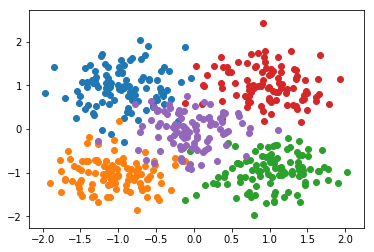

In [3]:
n_pts = 500
np.random.seed(0)
centers = [[-1,1], [-1,-1], [1,-1], [1,1], [0,0]]
X, y = datasets.make_blobs(n_samples=n_pts, random_state=123, centers=centers, cluster_std=0.4)
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])
plt.scatter(X[y==3, 0], X[y==3, 1])
plt.scatter(X[y==4, 0], X[y==4, 1])
plt.show()
y_cat = to_categorical(y, 5)
#print(y)
#print(y_cat)

In [5]:
np.random.seed(0)
model = Sequential()
model.add(Dense(units=5, input_shape=(2,), activation='softmax'))
adam = Adam(lr=0.01)
model.compile(adam, loss='categorical_crossentropy', metrics=['accuracy'])
h = model.fit(x=X, y=y_cat, batch_size=50, epochs=100)

Epoch 1/100
500/500 [==============================] - 0s 351us/step - loss: 2.1436 - acc: 0.0040
Epoch 2/100
500/500 [==============================] - 0s 32us/step - loss: 1.9629 - acc: 0.1380
Epoch 3/100
500/500 [==============================] - 0s 38us/step - loss: 1.7990 - acc: 0.2280
Epoch 4/100
500/500 [==============================] - 0s 45us/step - loss: 1.6537 - acc: 0.2780
Epoch 5/100
500/500 [==============================] - 0s 43us/step - loss: 1.5217 - acc: 0.3400
Epoch 6/100
500/500 [==============================] - 0s 35us/step - loss: 1.4063 - acc: 0.3980
Epoch 7/100
500/500 [==============================] - 0s 44us/step - loss: 1.3019 - acc: 0.4380
Epoch 8/100
500/500 [==============================] - 0s 40us/step - loss: 1.2099 - acc: 0.4880
Epoch 9/100
500/500 [==============================] - 0s 40us/step - loss: 1.1283 - acc: 0.5700
Epoch 10/100
500/500 [==============================] - 0s 47us/step - loss: 1.0574 - acc: 0.6640
Epoch 11/100
500/500 [======

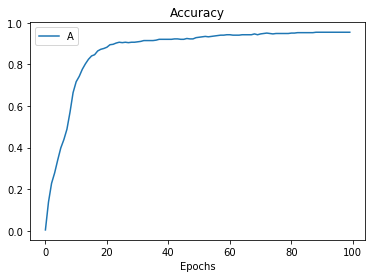

In [6]:
plt.plot(h.history['acc'])
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.legend('Accuracy')
plt.show()

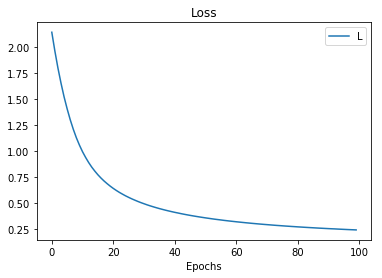

In [7]:
plt.plot(h.history['loss'])
plt.title('Loss')
plt.xlabel('Epochs')
plt.legend('Loss')
plt.show()

In [8]:
def plot_multiclass_decision_boundary(X, y , model):
    x_span = np.linspace(min(X[:,0] - 1 ), max(X[:,0] + 1))
    y_span = np.linspace(min(X[:,1] - 1), max(X[:,1]) + 1)
    xx, yy = np.meshgrid(x_span, y_span)
    xx_, yy_ = xx.ravel(), yy.ravel()
    grid = np.c_[xx_, yy_]
    #print(grid)
    pred_func = model.predict_classes(grid)
    z = pred_func.reshape(xx.shape)
    plt.contourf(xx, yy, z)

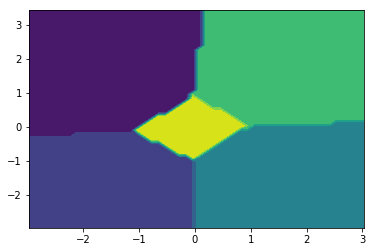

In [9]:
plot_multiclass_decision_boundary(X, y, model)
plt.show()

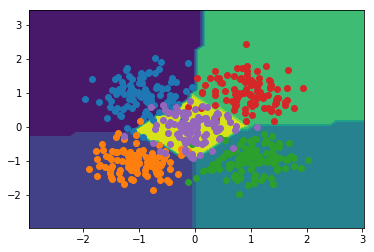

In [10]:
plot_multiclass_decision_boundary(X, y_cat, model)
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])
plt.scatter(X[y==3, 0], X[y==3, 1])
plt.scatter(X[y==4, 0], X[y==4, 1])
plt.show()

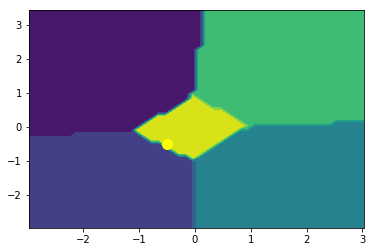

Prediction is:  [4]


In [17]:
plot_multiclass_decision_boundary(X, y_cat, model)
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])
plt.scatter(X[y==3, 0], X[y==3, 1])
plt.scatter(X[y==4, 0], X[y==4, 1])
x = -0.5
y = -0.5
prediction = model.predict_classes(np.array([[x ,y]]))
plt.plot([x], [y], marker='o', markersize='10', color='yellow')
plt.show()
print("Prediction is: ", prediction)